In [260]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

import json

# Load data from the sofascore file
with open('data/sofascore/shots.json', 'r') as f:
    shotmap_data = json.load(f)

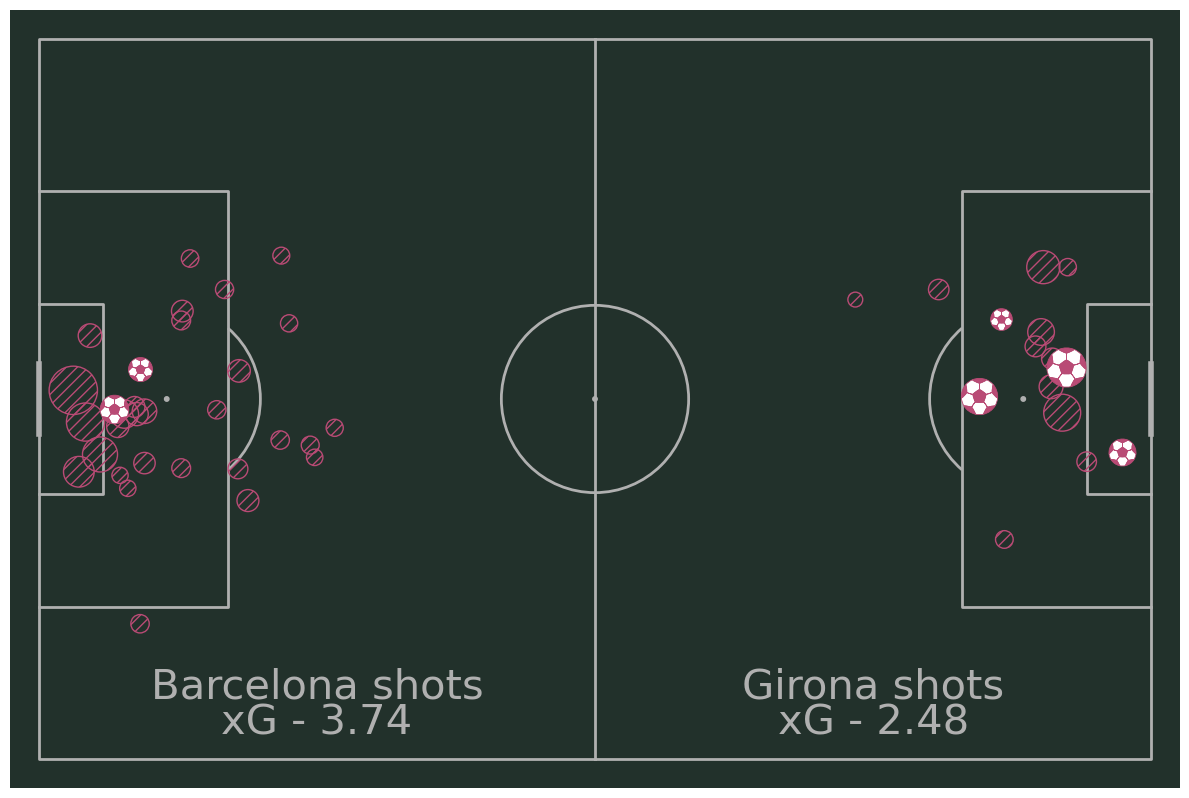

In [261]:
# Extract shot data for Girona
shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = Pitch(pitch_type='opta', pitch_color='#22312b')

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Separate goal and non-goal shots for Girona at away games
girona_goal_shots = [shot for shot in shots if shot['isHome'] == False and shot['shotType'] == 'goal']
girona_non_goal_shots = [shot for shot in shots if shot['isHome'] == False and shot['shotType'] != 'goal']

# Plot Girona non-goal shots with hatch
for shot in girona_non_goal_shots:
    x = 100 - shot['playerCoordinates']['x']
    y = 100 - shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', c='None', hatch='///', marker='o', ax=ax)

# Plot Girona goal shots with a color
for shot in girona_goal_shots:
    x = 100 - shot['playerCoordinates']['x']
    y = 100 - shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', linewidths=0.6, c='white', marker='football', ax=ax)

# Separate goal and non-goal shots for Barcelona at home games
barcelona_goal_shots = [shot for shot in shots if shot['isHome'] == True and shot['shotType'] == 'goal']
barcelona_non_goal_shots = [shot for shot in shots if shot['isHome'] == True and shot['shotType'] != 'goal']

# Plot Barcelona non-goal shots with hatch
for shot in barcelona_non_goal_shots:
    x = shot['playerCoordinates']['x']
    y = shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', c='None', hatch='///', marker='o', ax=ax)

# Plot Barcelona goal shots with a color
for shot in barcelona_goal_shots:
    x = shot['playerCoordinates']['x']
    y = shot['playerCoordinates']['y']
    xg = shot['xg']
    
    pitch.scatter(x, y, s=(xg * 1600) + 100, edgecolors='#b94b75', linewidths=0.6, c='white', marker='football', ax=ax)

# Add title
txt = ax.text(x=25, y=10, s='Barcelona shots', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=75, y=10, s='Girona shots', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=25, y=5, s='xG - 3.74', size=30, color=pitch.line_color, va='center', ha='center')
txt = ax.text(x=75, y=5, s='xG - 2.48', size=30, color=pitch.line_color, va='center', ha='center')

plt.show()

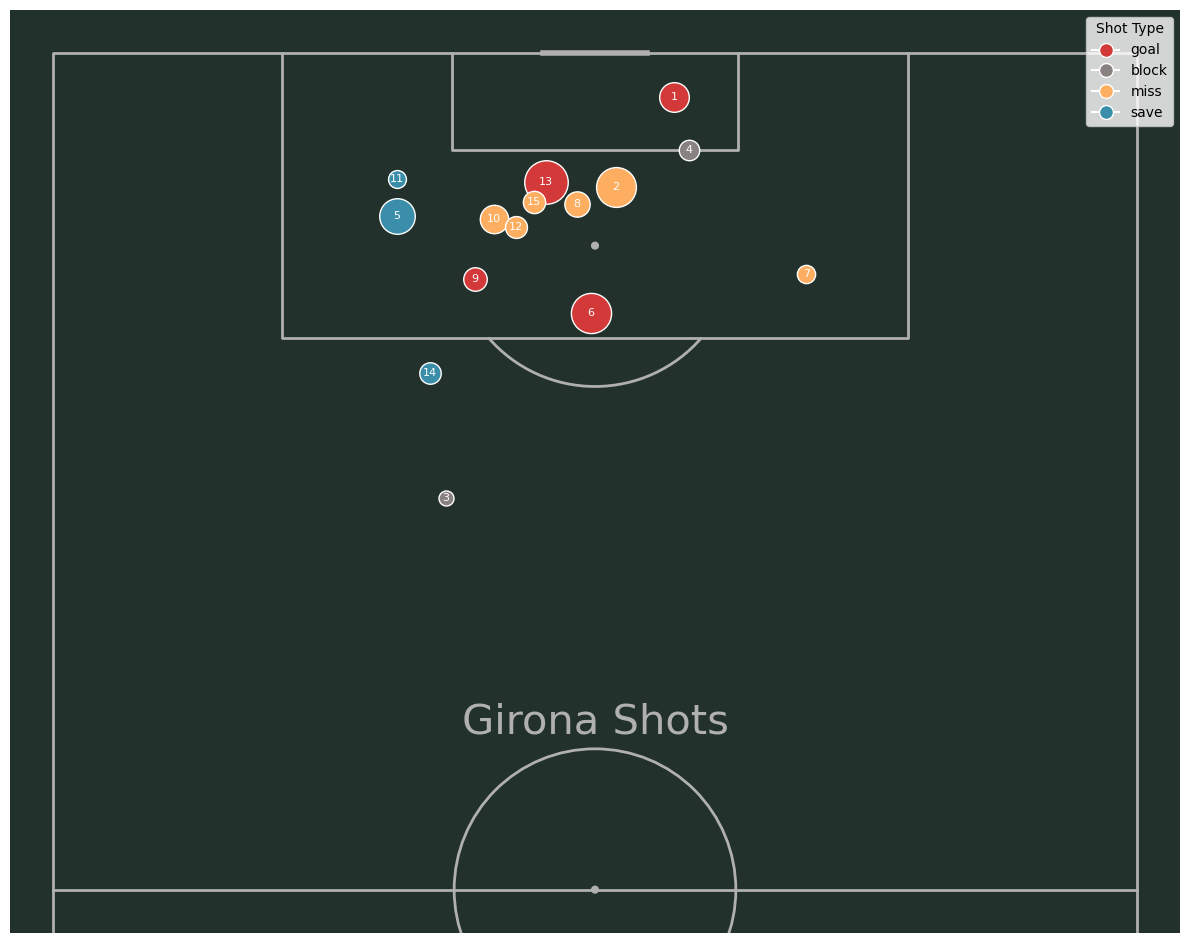

In [262]:
# Extract shot data for Girona
girona_shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', half=True)

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Dictionary to map shot types to colors
shot_type_colors = {
    'goal': '#d43939',
    'block': '#8a8181',
    'miss': '#fdae61',
    'save': '#3b8eaa'
}

# Separate goal and non-goal shots for Girona at away games
girona_goal_shots_away = [shot for shot in girona_shots if shot['isHome'] == False]


# Plot non-goal shots with hatch
for i, shot in enumerate(girona_goal_shots_away):
    x = 100 - shot['playerCoordinates']['y']
    y = 100 - shot['playerCoordinates']['x']
    xg = shot['xg']
    shot_type = shot['shotType']
    
    color = shot_type_colors.get(shot_type)
    
    ax.scatter(x, y, s=(xg * 1900) + 100, edgecolors='white', c=color, marker='o')
    ax.text(x, y, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

# Add title
txt = ax.text(x=50, y=60, s='Girona Shots', size=30, color=pitch.line_color, va='center', ha='center')

# Add legend for shot types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')


plt.show()


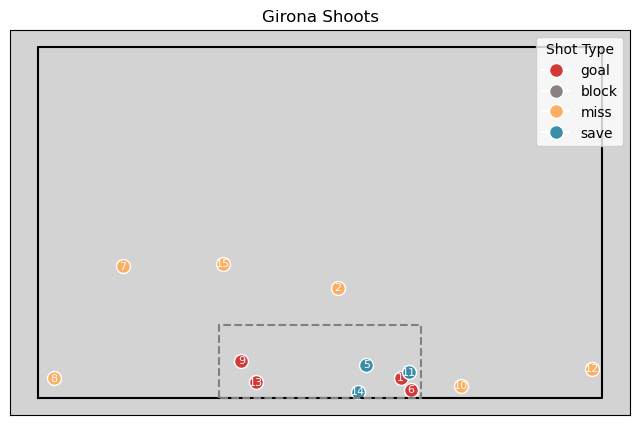

In [263]:
# Extract shot data for Girona
shots = shotmap_data['shotmap']
# Create a function to plot the football goal, shots, and goal area
def plot_goal_shots_and_area(shotmap_data):

    # Create a football goal plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_facecolor('lightgrey')  # Set background color
    ax.plot([-20, -20, 120, 120, -20], [0, 120, 120, 0, 0], color='black')  # Football goal outline
    
    girona_shots = [shot for shot in shotmap_data if shot['isHome'] == False]
    

    # Scatter shots on the goal for non-home shots
    for i, shot in enumerate(girona_shots):
        if shot['shotType'] != 'block':
            goal_coordinates = shot['draw']['goal']
            shot_type = shot['shotType']
            color = shot_type_colors.get(shot_type)
            if (50 - goal_coordinates['x']) >= 0:
                ax.scatter(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)
            else:
                ax.scatter(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

    # Draw the football goal area
    goal_area_x = [25, 25, 75, 75, 25]
    goal_area_y = [0, 25, 25, 0, 0]
    ax.plot(goal_area_x, goal_area_y, color='gray', linestyle='dashed', label='Goal Area')

    # Hide axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Girona Shoots')

    # Add legend for shot types
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
    ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')

    # Show the plot
    plt.show()

# Call the function with your shotmap data
plot_goal_shots_and_area(shots)

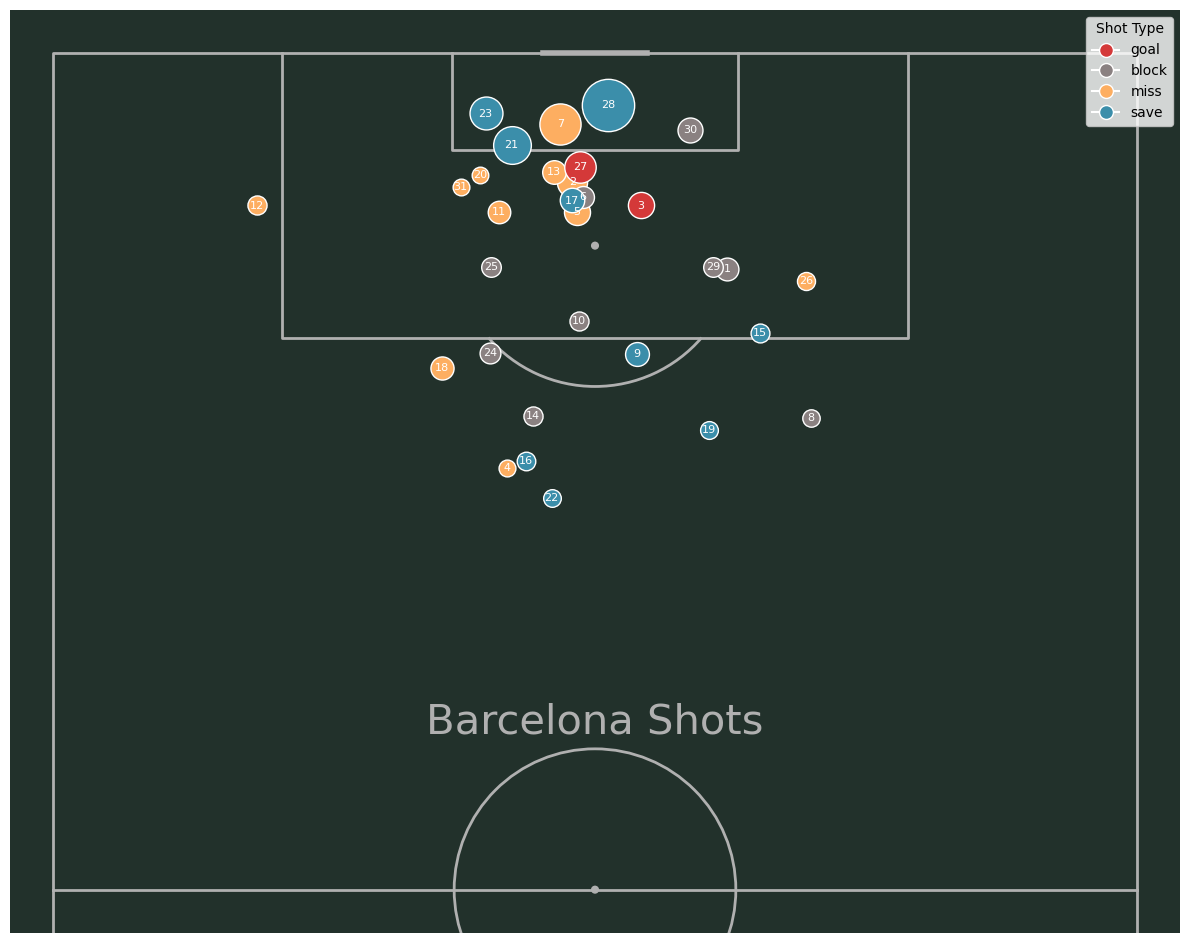

In [264]:
# Extract shot data for Girona
barcelona_shots = shotmap_data['shotmap']

# Create an mplsoccer Pitch
pitch = VerticalPitch(pitch_type='opta', pitch_color='#22312b', half=True)

# Plot the shots on the pitch
fig, ax = pitch.draw(figsize=(12, 10))

# Dictionary to map shot types to colors
shot_type_colors = {
    'goal': '#d43939',
    'block': '#8a8181',
    'miss': '#fdae61',
    'save': '#3b8eaa'
}

# Separate goal and non-goal shots for Girona at away games
barcelona_goal_shots = [shot for shot in barcelona_shots if shot['isHome'] == True]

# Plot non-goal shots with hatch
for i, shot in enumerate(barcelona_goal_shots):
    x = 100 - shot['playerCoordinates']['y']
    y = 100 - shot['playerCoordinates']['x']
    xg = shot['xg']
    shot_type = shot['shotType']
    
    color = shot_type_colors.get(shot_type)
    
    ax.scatter(x, y, s=(xg * 1900) + 100, edgecolors='white', c=color, marker='o')
    ax.text(x, y, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

# Add title
txt = ax.text(x=50, y=60, s='Barcelona Shots', size=30, color=pitch.line_color, va='center', ha='center')

# Add legend for shot types
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')


plt.show()


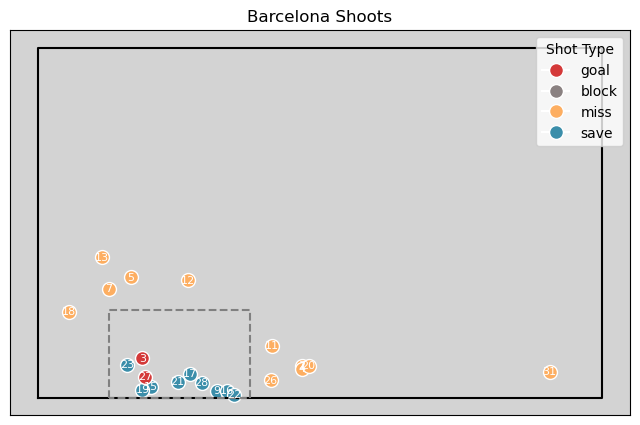

In [265]:
# Create a function to plot the football goal, shots, and goal area
def plot_goal_shots_and_area(shotmap_data):
    # Create a football goal plot
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_facecolor('lightgrey')  # Set background color
    ax.plot([0, 0, 200, 200, 0], [0, 100, 100, 0, 0], color='black')  # Football goal outline
    
    barcelona_shots = [shot for shot in shotmap_data if shot['isHome'] == True]

    # Scatter shots on the goal for non-home shots
    for i, shot in enumerate(barcelona_shots):
        if shot['isHome'] == True and shot['shotType'] != 'block':
            goal_coordinates = shot['draw']['goal']
            shot_type = shot['shotType']
            color = shot_type_colors.get(shot_type)
            if (50 - goal_coordinates['x']) >= 0:
                ax.scatter(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 - ((50 - goal_coordinates['x'])*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)
            else:
                ax.scatter(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=100, marker='o', edgecolors='white', c=color)
                ax.text(50 + (abs((50 - goal_coordinates['x']))*5), (100 - goal_coordinates['y'])/1.7, s=str(i+1), color='white', ha='center', va='center', fontsize=8)

    # Draw the football goal area
    goal_area_x = [25, 25, 75, 75, 25]
    goal_area_y = [0, 25, 25, 0, 0]
    ax.plot(goal_area_x, goal_area_y, color='gray', linestyle='dashed', label='Goal Area')

    # Hide axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Barcelona Shoots')

    # Add legend for shot types
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=shot_type, markerfacecolor=color, markersize=10) for shot_type, color in shot_type_colors.items()]
    ax.legend(handles=legend_elements, loc='upper right', title='Shot Type')

    # Show the plot
    plt.show()

# Call the function with your shotmap data
plot_goal_shots_and_area(shots)